
# 930. Binary Subarrays With Sum

### Difficulty: <font color = orange> Medium </font>
---
Given a binary array `nums` and an integer `goal`, return the number of non-empty subarrays with a sum `goal`.

A subarray is a contiguous part of the array.

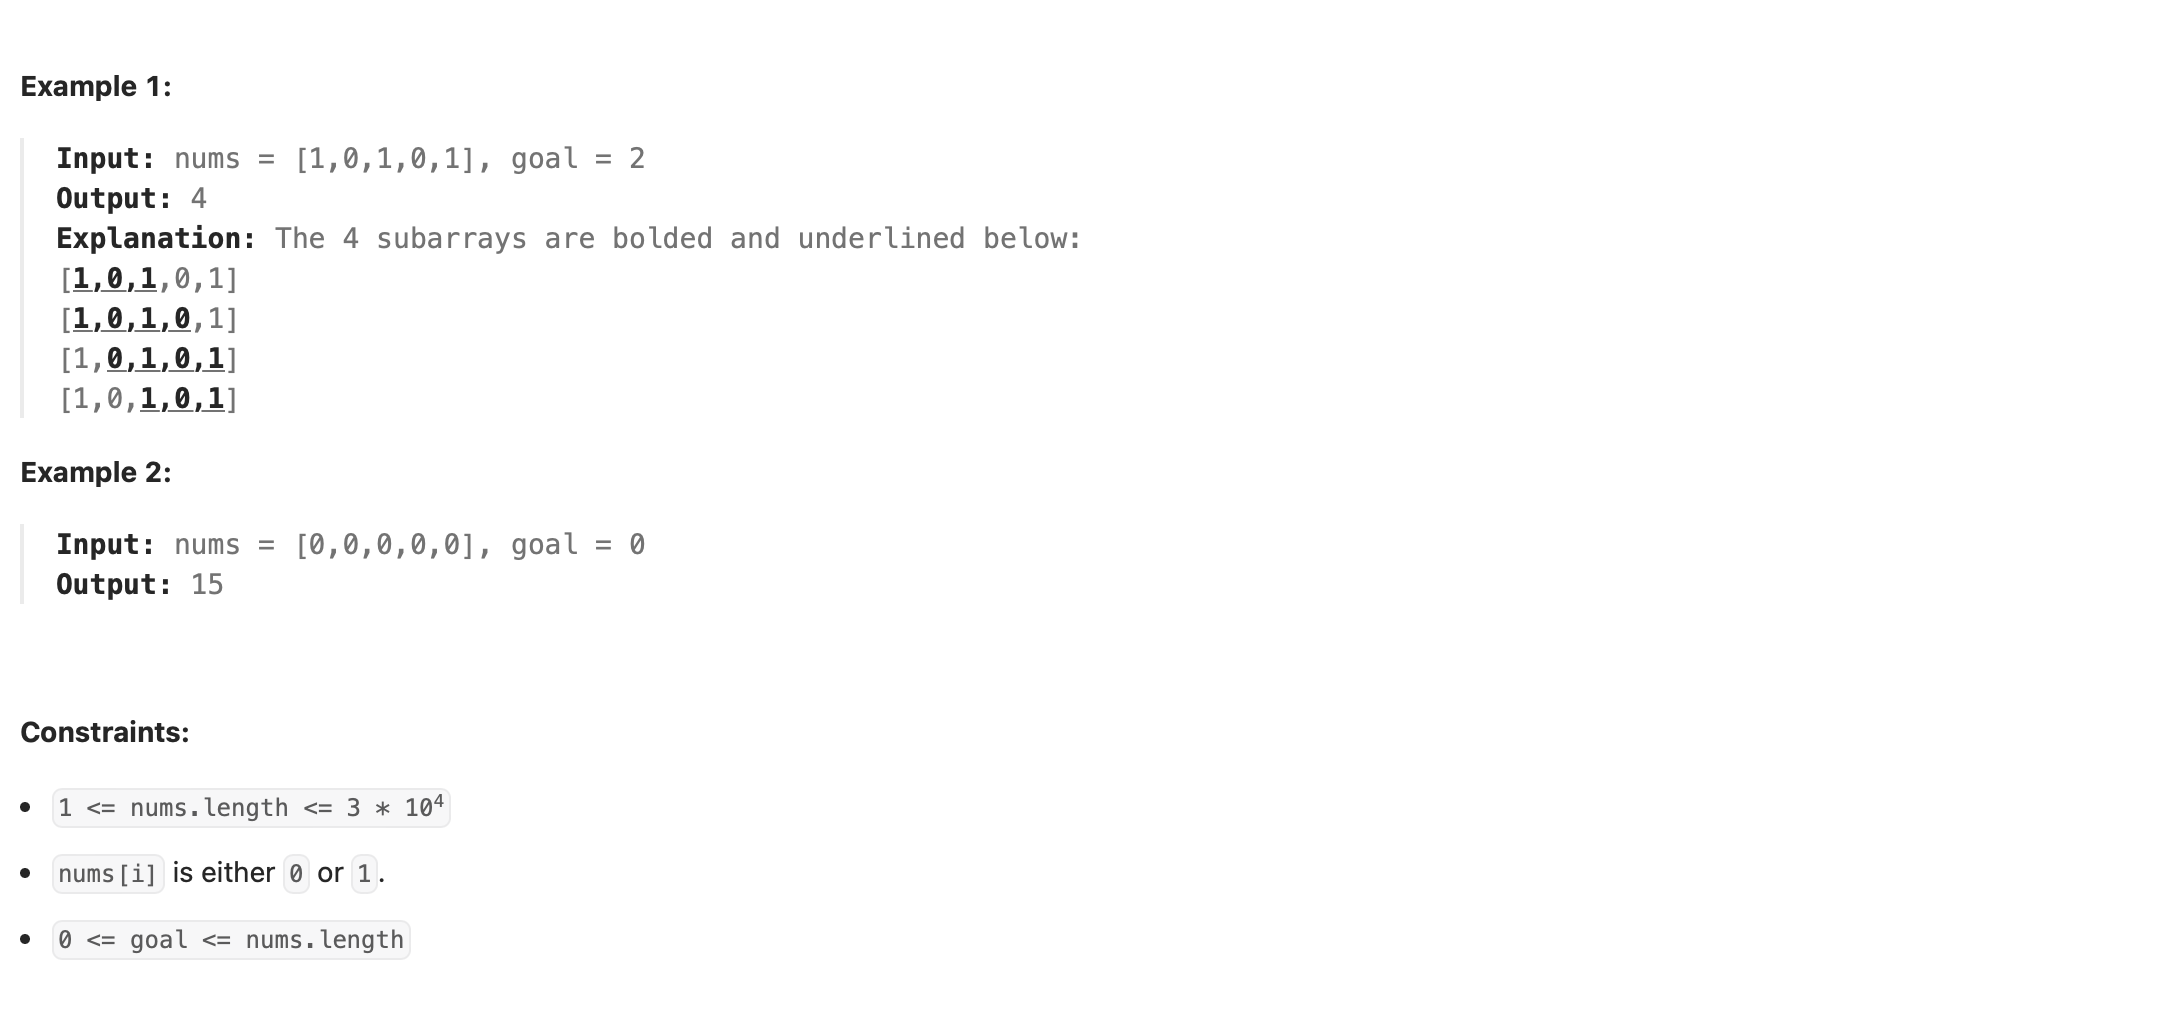

## Approach Overview:

To find the total number of subarrays with sum equal to `goal`, we find the difference between the number of subarrays with sum less than or equal to `goal` and number of subarrays with sum less than or equal to `goal - 1`.

**subarrays with sum equal to `goal` = (subarrays with sum $<=$ `goal`) - (subarrays with sum $<=$ `goal - 1`)**

This is a trick called AtMost.

So all we have to do is use sliding window to find the total number of subarrays with sum $<=$ `x` and using recursion find the result for when sum $<=$ `x` and subtract it with when sum $<=$ `x - 1` to find the number of subarrays with sum = `x` (pretty clever eh!).


## Detailed Explanation:


To find the total number of subarrays with sum equal to `goal`, we find the difference between the number of subarrays with sum less than or equal to `goal` and number of subarrays with sum less than or equal to `goal - 1`.

**subarrays with sum equal to `goal` = (subarrays with sum $<=$ `goal`) - (subarrays with sum $<=$ `goal - 1`)**

This is a trick called AtMost.

So all we have to do is use sliding window to find the total number of subarrays with sum $<=$ `x` and using recursion find the result for when sum $<=$ `x` and subtract it with when sum $<=$ `x - 1` to find the number of subarrays with sum = `x` (pretty clever eh!).

So atMost is a classic sliding window. We implement it through the some form of a helper function.
We called the function `atMostK`.

Let's walk through it. 

We'll keep adding elements to the window (subarray) as long as the sum of elements in it is less than or equal to `goal`. 

If window (subarray) becomes invalid (i.e. if sum of elements in subarray window becomes larger than goal then shrink the window by removing elements from the left of it (until it becomes valid again).

Finally we now just compute the number of subarrays with sum equal to goal

`return atMostK(goal) - atMostK(goal - 1)`

## Key Problems:
This was a new learning from me (this atMostTrick I meant). So you best know i got no where trying to come up with a solution for this problem.

## Solution:

In [ ]:
class Solution:
    def numSubarraysWithSum(self, nums: List[int], goal: int) -> int:
        
        def atMostK(k):
            
            # initialize `count` variable to track total number of valid subarrays seen so far
            count = 0

            # initialize `left` pointer to use for the sliding window
            left = 0

            # initialize `currentSum` variable to track sum of integers in current subarray 
            currentSum = 0
            
            # loop through every integer in nums
            for right in range(len(nums)):
                
                # calculate the current sum of integers in subarray
                currentSum += nums[right]

                # check if subarray is invalid
                # subarray is invalid if left pointer exceeds right pointer
                # AND
                # if sum is less than or equal to `goal` 
                while left <= right and currentSum > goal:

                    # shrink subarray window by removing leftmost integer in it
                    currentSum -= nums[left]

                    # increment left to slide the subarray window
                    left += 1

                # compute the total number of valid subarrays seen so far 
                count += right - left + 1   
                
            # return total number of subarrays with a sum that's <= goal
            return count 

        # calculate the number of subarrays with a sum equal to goal
        return atMostK(goal) - atMostK(goal-1)